In [5]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from main import *

@nb.njit
def delta_x(positionX, others, boundaryLength, halfLength):
    subX = positionX - others
    adjustOthers = (
        others * (-halfLength <= subX) * (subX <= halfLength) + 
        (others - boundaryLength) * (subX < -halfLength) + 
        (others + boundaryLength) * (subX > halfLength)
    )
    adjustSubX = positionX - adjustOthers
    return adjustSubX

# 定义计算序参量的函数
def get_order_parameter(model: ObsAvoid, savePath: str = "./data", ):
    targetPath = f"{savePath}/{model}.h5"
    totalPositionX = pd.read_hdf(targetPath, key="positionX")
    totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
    totalPointTheta = pd.read_hdf(targetPath, key="pointTheta")
    TNum = totalPositionX.shape[0] // model.agentsNum
    totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2)
    totalPhaseTheta = totalPhaseTheta.values.reshape(TNum, model.agentsNum)
    totalPointTheta = totalPointTheta.values.reshape(TNum, model.agentsNum)
    N = totalPhaseTheta.shape[1]
    orderParameter = (
        (np.sum(np.sin(totalPhaseTheta), axis=1) / N) ** 2 + 
        (np.sum(np.cos(totalPhaseTheta), axis=1) / N) ** 2
    )**0.5
    return orderParameter

# 计算空间聚集程度序参量的函数
def get_spatial_order_parameter(model: ObsAvoid, radius: float = 1.0, savePath: str = "./data"):
    targetPath = f"{savePath}/{model}.h5"
    totalPositionX = pd.read_hdf(targetPath, key="positionX")
    totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
    totalPointTheta = pd.read_hdf(targetPath, key="pointTheta")
    TNum = totalPositionX.shape[0] // model.agentsNum
    totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2)
    totalPhaseTheta = totalPhaseTheta.values.reshape(TNum, model.agentsNum)
    totalPointTheta = totalPointTheta.values.reshape(TNum, model.agentsNum)
    ops = []
    for i in range(TNum):
        positionX = totalPositionX[i]
        N = totalPhaseTheta.shape[1]
        deltaX = delta_x(positionX, positionX[:, np.newaxis], model.boundaryLength, model.boundaryLength / 2)
        distance = np.sqrt(np.sum(deltaX ** 2, axis=-1))
        withinRadius = distance < radius
        ops.append(np.mean(np.sum(withinRadius, axis=1) / N))
    return np.array(ops)

In [6]:
# 在这里填入你的模型参数，确保之前已经在run.ipynb中运行过你的模型, 即已经保存了模型数据在./data文件夹下
model = ObsAvoid(strengthLambda=5, alpha=1, dt=0.005,
                 savePath="./data", tqdm=True, overWrite=True)

In [7]:
# 调用函数计算模型随时间的序参量变化
op = get_spatial_order_parameter(model)

In [8]:
# 查看序参量值
op

array([0.03241 , 0.032432, 0.032446, 0.032556, 0.032706, 0.032708,
       0.032816, 0.0328  , 0.032956, 0.033064, 0.033036, 0.033118,
       0.033182, 0.033204, 0.03317 , 0.03306 , 0.033296, 0.033278,
       0.033278, 0.033282, 0.033104, 0.033164, 0.03343 , 0.033644,
       0.033804, 0.033784, 0.033694, 0.033724, 0.033838, 0.033824,
       0.03397 , 0.034036, 0.034252, 0.034184, 0.03424 , 0.034426,
       0.03441 , 0.034398, 0.034398, 0.034668, 0.035008, 0.034938,
       0.035262, 0.03528 , 0.03527 , 0.035336, 0.035122, 0.035194,
       0.03532 , 0.035644, 0.036052, 0.03639 , 0.036506, 0.036568,
       0.036668, 0.03666 , 0.036658, 0.03663 , 0.036802, 0.037036,
       0.037038, 0.036976, 0.036822, 0.037046, 0.03725 , 0.037354,
       0.037442, 0.037464, 0.037748, 0.037976, 0.038272, 0.03826 ,
       0.038492, 0.038784, 0.038868, 0.039032, 0.039144, 0.039232,
       0.039574, 0.039728, 0.039876, 0.040228, 0.040356, 0.040232,
       0.040506, 0.040912, 0.041228, 0.041616, 0.04211 , 0.042

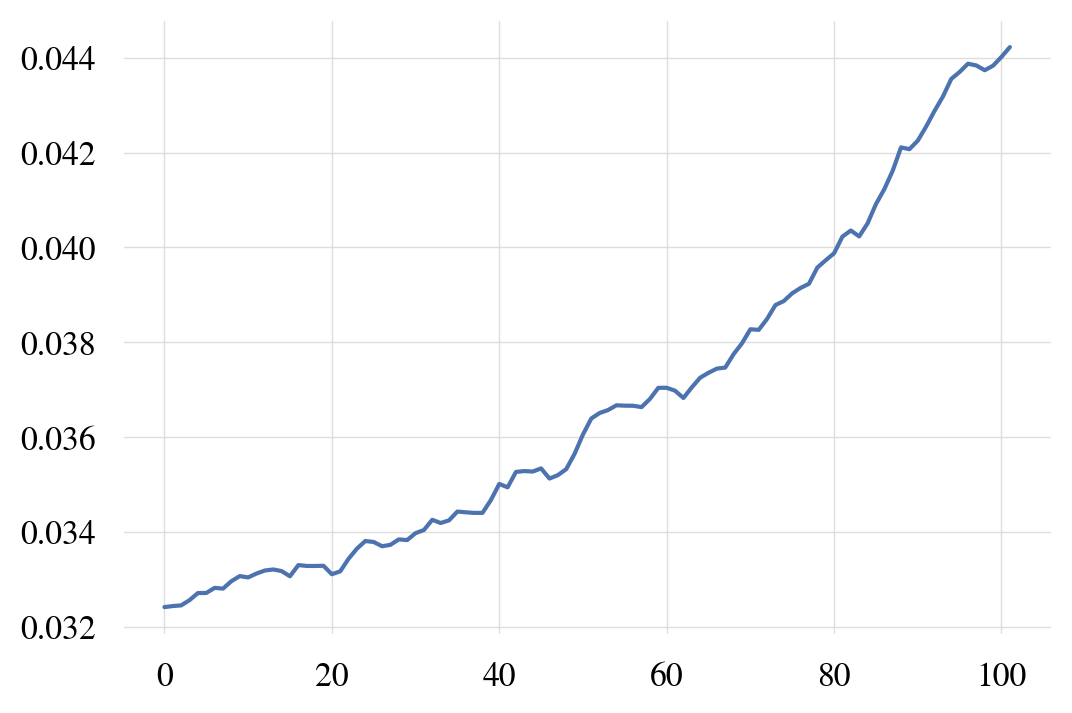

In [9]:
# 画出序参量随时间的变化
plt.figure(figsize=(6, 4))
plt.plot(op)

In [10]:
# 如果需要看终态的值，就看最后一个值
op[-1]

0.04422600000000001